#  EDUNET FOUNDATION-Self Practice Excercise

## LAB 2 - Demonstrating Ridge Regression on Emission Data
## Problem Statement

### ""For extended data of CO2 emission ("Excercise_Data_1.csv"). 
### Company needs a Regularized Ridge regression model to predict the emission generate from a newly produced car.

### Load Needful Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

### Load the dataset

In [2]:
df = pd.read_csv("Excercise_Data_1.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### Select features that we want to use for regression.

In [3]:
df.select_dtypes(exclude=['object'])

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


### Select integer and float datatype columns

In [4]:
df_num = df.select_dtypes(['int','float'])
df_num

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


### Lets Visualize some relation between variables



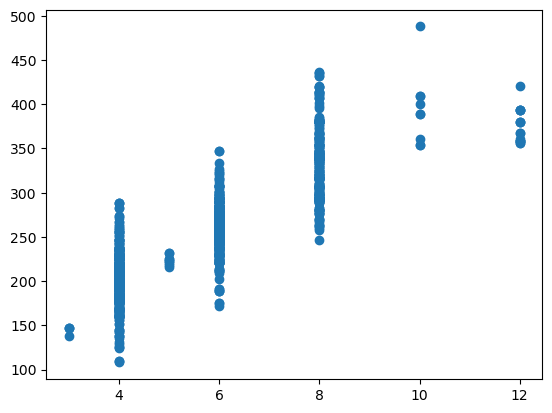

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df_num['CYLINDERS'],df_num['CO2EMISSIONS'])

### Select columns of interest from whole data 

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


### Generate plot betwen engine size and emission

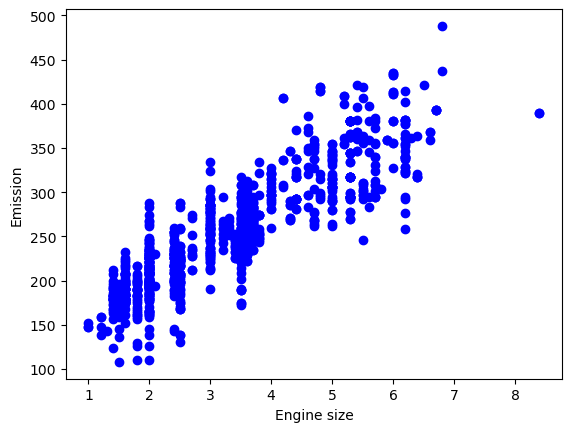

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Lets proceed with selected data

In [8]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   FUELCONSUMPTION_HWY   1067 non-null   float64
 4   FUELCONSUMPTION_COMB  1067 non-null   float64
 5   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 50.1 KB


### Check feature names

In [9]:
cdf.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'],
      dtype='object')

### Split data into Train Test set

In [10]:
df_train,df_test = train_test_split(cdf, train_size=0.7,test_size = 0.3, random_state=100)
y_train = df_train.CO2EMISSIONS
X_train = df_train.drop("CO2EMISSIONS",1)

y_test  = df_test.CO2EMISSIONS
X_test = df_test.drop("CO2EMISSIONS",1)

C:\Users\Diwakar\AppData\Local\Temp\ipykernel_5560\2256509735.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = df_train.drop("CO2EMISSIONS",1)
C:\Users\Diwakar\AppData\Local\Temp\ipykernel_5560\2256509735.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = df_test.drop("CO2EMISSIONS",1)


### Scale the data

In [11]:
features_select=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']
scaler = StandardScaler()
X_train[features_select] = scaler.fit_transform(X_train[features_select])
X_test[features_select] = scaler.transform(X_test[features_select])

### Train model and select best alpha values

In [12]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [13]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-17.274267002416142


### Tabulate model performance on investigated alphas

In [14]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022371,0.041773,0.001008,0.000633,0.0001,{'alpha': 0.0001},-20.039638,-16.279191,-15.191241,-16.783280,...,-17.320155,1.689639,25,-16.109286,-17.560636,-17.560382,-17.296017,-16.757688,-17.056802,0.557121
1,0.003235,0.002632,0.000992,0.000014,0.001,{'alpha': 0.001},-20.038052,-16.279577,-15.189422,-16.783088,...,-17.318920,1.689206,24,-16.109021,-17.558420,-17.560468,-17.296035,-16.757983,-17.056385,0.556796
2,0.003318,0.001597,0.001402,0.000800,0.01,{'alpha': 0.01},-20.030801,-16.284985,-15.176309,-16.781686,...,-17.311354,1.687120,23,-16.109827,-17.545756,-17.561087,-17.296174,-16.762018,-17.054972,0.553953
3,0.003082,0.000565,0.002244,0.001330,0.05,{'alpha': 0.05},-20.031050,-16.293384,-15.155922,-16.779307,...,-17.302492,1.688069,22,-16.120742,-17.536812,-17.563642,-17.296495,-16.771529,-17.057844,0.548148
4,0.004228,0.001925,0.002273,0.001819,0.1,{'alpha': 0.1},-20.035180,-16.296325,-15.148927,-16.778211,...,-17.300776,1.690055,21,-16.125588,-17.535389,-17.565192,-17.296755,-16.776110,-17.059807,0.546074
5,0.004166,0.003426,0.003071,0.002665,0.2,{'alpha': 0.2},-20.037621,-16.298248,-15.146618,-16.777015,...,-17.299886,1.690687,20,-16.128980,-17.535053,-17.567237,-17.297211,-16.779412,-17.061579,0.544931
6,0.005875,0.001776,0.001803,0.001332,0.3,{'alpha': 0.3},-20.038267,-16.298947,-15.146307,-16.776136,...,-17.299463,1.690695,19,-16.130307,-17.535842,-17.568254,-17.297628,-16.780942,-17.062595,0.544680
7,0.001064,0.000893,0.000395,0.000484,0.4,{'alpha': 0.4},-20.038384,-16.299283,-15.146279,-16.775360,...,-17.299119,1.690596,18,-16.131025,-17.536283,-17.568933,-17.298030,-16.781776,-17.063209,0.544585
8,0.003132,0.006265,0.000000,0.000000,0.5,{'alpha': 0.5},-20.038274,-16.299461,-15.146371,-16.774633,...,-17.298809,1.690452,17,-16.131483,-17.536573,-17.569398,-17.298422,-16.782310,-17.063637,0.544544
9,0.003502,0.006106,0.000201,0.000403,0.6,{'alpha': 0.6},-20.038045,-16.299556,-15.146524,-16.773937,...,-17.298519,1.690285,16,-16.131805,-17.536785,-17.569752,-17.298806,-16.782687,-17.063967,0.544531


### Tune to best performing alpha and instantiate Ridge model

In [15]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([15.29836668, 13.28384664, 13.91176961,  8.35933548, 12.26243976])

### lets predict the R-squared value

In [16]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_train, y_train_pred))

0.8649952679298808
560.0978316176019


In [17]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print(mean_squared_error(y_test, y_test_pred))

0.8605770535296643
514.2264871371036
